# **K-Means Clustering**

**Name - Mitul Srivastava**

**ID - C00313606**


## LOG : Introduction to dataset and importing the data
### **Dataset** :  Penguins dataset
### **Link** : https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species
### **Details** : The datset contains total 5 columns which are culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g and sex.
### **AIM** : To use and fine tune K-means algorithm to create clusters for different species of penguins.

In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/Mitul/Desktop/Study/Algorithms/K-means/penguins.csv")
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


## **LOG** : Preprocessing

### 1. Dropping the null rows from dataset.

In [3]:
data.dropna(inplace=True)
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


### 2. Moving further in the program it was observed that there was an additional value in the column "SEX" other than MALE and FEMALE.

In [5]:
data["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

### 3. As there is only 1 row with "SEX" as '.' and there is not other way to determine the same that 1 row has been dropped.

In [6]:
data = data.drop(data[data["sex"]=='.'].index)

### 4. SEX being a categorical column the values were changed to number with "0" for MALE and "1" for FEMALE.

In [7]:
data['sex'] = data['sex'].map({'MALE': 0, 'FEMALE': 1})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   334 non-null    float64
 1   culmen_depth_mm    334 non-null    float64
 2   flipper_length_mm  334 non-null    float64
 3   body_mass_g        334 non-null    float64
 4   sex                334 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.7 KB


### 5. Using standard scaler function from sklearn.preprocessing to standardize the values as to similar scale.
### **Importance** - This step is important as algorithms like k-means are affected by the scale of values so that the columns with higher scale do not dominate over other features this is necessary to do.

In [9]:
X= data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **LOG** : Determinig K using Elbow method.
### The below code is used to find the optimal value of k using elbow method. In the below plot we see that after k = 4 there is not a sharp decrease in inertia from which we can infer that we can take the value of k as 4 because increasing the value of k won't change the result much keeping the computational requirement for the increased value of k in mind.

### *Inertia is a measure of how well the clusters are formed in K-Means clustering. It represents the sum of squared distances of each data point to its closest cluster center (centroid).*

C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mitul\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

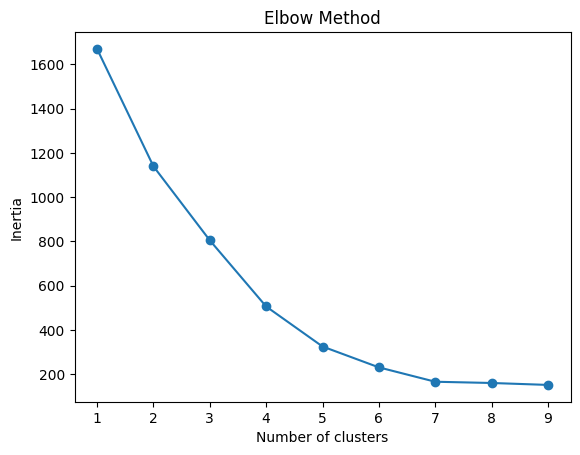

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### **LOG** : Dimentionality reduction using Principal component analysis
### Performing Principal Component Analysis (PCA) using the sklearn.decomposition.PCA class. PCA is a dimensionality reduction technique commonly used to reduce the number of features (or dimensions) in a dataset while preserving as much variability (information) as possible.

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['pca1'], data['pca2'] = X_pca[:, 0], X_pca[:, 1]

### **LOG** : Training the k-Means model and Visualizing the clusters. 

<Axes: xlabel='pca1', ylabel='pca2'>

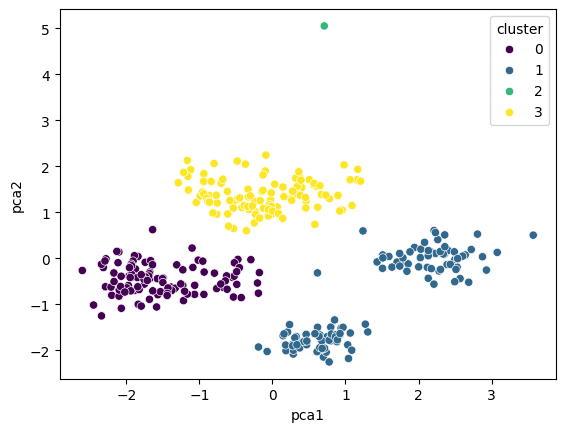

In [48]:
import seaborn as sns
model = KMeans(n_clusters=4, random_state=42)
data['cluster'] = model.fit_predict(X_scaled)

sns.scatterplot(x='pca1', y='pca2', hue=data['cluster'], palette='viridis', data=data)


### **LOG** : Evaluating default K-means model using Silhoutte score.
### *The Silhoutte score shows how well each point is clustered and its value ranges from -1 to 1 with higher the value better the clustering is done by model*
### The default K-Means model has a Silhoutte score of 0.4486.

In [44]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled,data['cluster']
                            )
print(f'Silhouette Score for default k-Means: {sil_score:.4f}')

Silhouette Score for default k-Means: 0.4486


### **LOG** : Tweaking hyperparameters
### Below we have created two K-means models with different initializations.

### The "random" initialization chooses cluster centers randomly from the data. While "K-Means++" chooses the first point at random and then chooses the next centroid as far as possible from the already chosen ones.

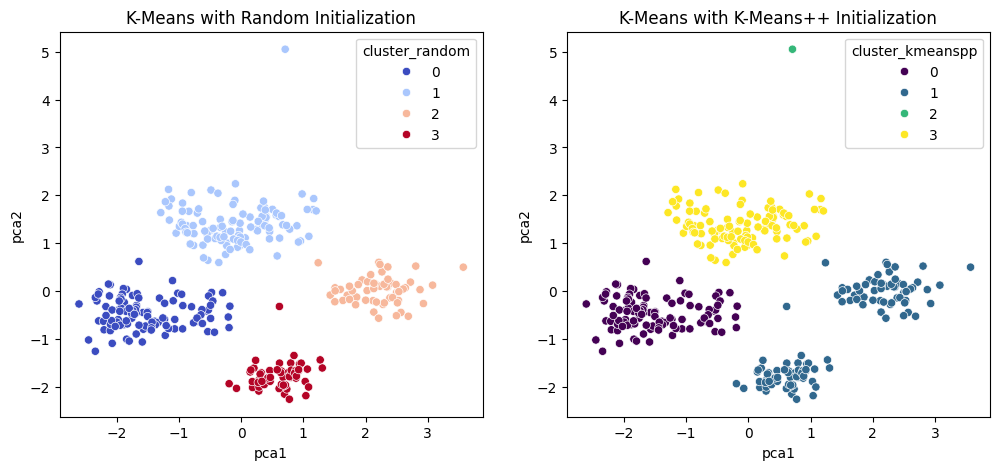

In [45]:
kmeans_random = KMeans(n_clusters=4, init='random', random_state=42)
kmeans_kmeanspp = KMeans(n_clusters=4, init='k-means++', random_state=42)

data['cluster_random'] = kmeans_random.fit_predict(X_scaled)
data['cluster_kmeanspp'] = kmeans_kmeanspp.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='pca1', y='pca2', hue=data['cluster_random'], palette='coolwarm', data=data, ax=axes[0])
axes[0].set_title("K-Means with Random Initialization")

sns.scatterplot(x='pca1', y='pca2', hue=data['cluster_kmeanspp'], palette='viridis', data=data, ax=axes[1])
axes[1].set_title("K-Means with K-Means++ Initialization")

plt.show()

### **LOG** : Modified K-Means models results.
### **RESULTS** : The Random model has a Silhoutte score of 0.5091 while K-means++ score is 0.4486 making the Random initialization model best among the 3 scenarios.

In [50]:
sil_score = silhouette_score(X_scaled, data['cluster_random'])
print(f'Silhouette Score for K-means Random initialization: {sil_score:.4f}')

sil_score = silhouette_score(X_scaled, data['cluster_kmeanspp'])
print(f'Silhouette Score for k-means++ initialization : {sil_score:.4f}')

Silhouette Score for K-means Random initialization: 0.5091
Silhouette Score for k-means++ initialization : 0.4486


### **REFERENCES** :
### https://chatgpt.com/
### https://www.kaggle.com/
### https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb

## **END**